In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import seaborn as sns
import plotly.figure_factory as ff
import os
import imageio

In [2]:
train_ratio = 0.7
vali_ratio = 0.2
seq_len = 48
pred_len = 12

In [3]:
df_raw = pd.read_csv('C:/Seq_predict_models/dataset/Machine_Util/machine_util_m_2.csv')

In [4]:
num_train = int(len(df_raw) * train_ratio)
num_vali = int(len(df_raw) * vali_ratio)
num_test = len(df_raw) - num_train - num_vali
test_start = num_train + num_test

In [5]:
pred = np.load('pred.npy')
true = np.load('true.npy')

In [6]:
target = df_raw['m_2'][0:num_train]

In [7]:
mmax = np.max(target)
mmin = np.min(target)

In [8]:
pred_inverse = pred * (mmax - mmin) + mmin
true_inverse = true * (mmax - mmin) + mmin

In [9]:
len(pred_inverse)

7808

In [10]:
def mean_absolute_scaled_error(y_test, y_pred, y_train, sp=1):
    y_train = np.asarray(y_train)
    y_pred_naive = y_train[:-sp]
    
    mae_naive = np.mean(np.abs(y_train[sp:] - y_pred_naive))
    if mae_naive == 0:
        return np.nan
    else:
        return np.mean(np.abs(y_test - y_pred)) / mae_naive

In [11]:
def mms_calc(x, y):
    """This function provide a information about the MMS(Mean Maximum shift)."""
    x_argmax = np.argmax(x)
    y_argmax = np.argmax(y)

    distance = np.abs(y_argmax - x_argmax)
    return distance

In [12]:
def root_mean_squared_error(actual, predicted): 
    return np.sqrt(mean_squared_error(actual, predicted))
    

In [13]:
def normalized_root_mean_squared_error(actual: np.ndarray, predicted: np.ndarray):
    return root_mean_squared_error(actual, predicted) / (actual.max() - actual.min())

In [ ]:
def mape_without_zero(actual, predicted):
    z_index = np.where(actual == 0)[0]
    if len(z_index) == len(actual):
        return None
    else:
        r_zero_actual = np.delete(actual, z_index)
        r_zero_predict = np.delete(predicted, z_index)
        return mean_absolute_percentage_error(r_zero_actual, r_zero_predict)

In [14]:
mse = []
mae = []
rmse = []
# nrmse = []
mape = []
mase = []
mms = []
r2 = []
for i in np.arange(int(len(true_inverse))):
    yd = true_inverse[i]
    dp = pred_inverse[i]
    MSE = mean_squared_error(yd, dp)
    MAE = mean_absolute_error(yd, dp)
    RMSE = root_mean_squared_error(yd, dp)
    # NRMSE = normalized_root_mean_squared_error(yd, dp)
    MAPE = mean_absolute_percentage_error(yd, dp)
    MASE = mean_absolute_scaled_error(yd, dp, yd)
    MMS = mms_calc(yd, dp)
    R2 = r2_score(yd, dp)
    
    mse.append(MSE)
    mae.append(MAE)
    rmse.append(RMSE)
    # nrmse.append(NRMSE)
    if MAPE == None:
        pass
    else:
        mape.append(MAPE)
    mase.append(MASE)
    mms.append(MMS)
    r2.append(R2)

In [38]:
def nth_points_evaluate_matrices(n):
    mse_n = []
    mae_n = []
    rmse_n = []
    mape_n = []
    for i in np.arange(int(len(true_inverse))):
        nyd = true_inverse[i][0:n]
        ndp = pred_inverse[i][0:n]
        nMSE = mean_squared_error(nyd, ndp)
        nMAE = mean_absolute_error(nyd, ndp)
        nRMSE = root_mean_squared_error(nyd, ndp)
        nMAPE = mean_absolute_percentage_error(nyd, ndp)
        
        mse_n.append(nMSE)
        mae_n.append(nMAE)
        rmse_n.append(nRMSE)
        if nMAPE == None:
            pass
        else:
            mape_n.append(nMAPE)
        
    print(f'{n} points MSE:', sum(mse_n) / len(mse_n))
    print(f'{n} points MAE:', sum(mae_n) / len(mae_n))
    print(f'{n} points RMSE:', sum(rmse_n) / len(rmse_n))
    print(f'{n} points MAPE:', sum(mape_n) / len(mape_n))
                    
    # return mse_n, mae_n, rmse_n , mape_n
    

In [37]:
print('MSE:', sum(mse) / len(mse))
print('MAE:', sum(mae) / len(mae))
print('RMSE:', sum(rmse) / len(rmse))
print('MAPE:', sum(mape) / len(mape))
#　print('NRMSE:', sum(nrmse) / len(nrmse))

MSE: 37.026154086367825
MAE: 4.389594482746525
RMSE: 5.148669394840043
MAPE: 0.15617806711291407


In [39]:
nth_points_evaluate_matrices(1)

1 points MSE: 11.143484713236397
1 points MAE: 2.3749953435092674
1 points RMSE: 2.3749953435092674
1 points MAPE: 0.08614744158312015


In [40]:
nth_points_evaluate_matrices(6)

6 points MSE: 26.64898721587016
6 points MAE: 3.6711229213635574
6 points RMSE: 4.222426002471113
6 points MAPE: 0.13068560637666302


In [16]:
# np.save('mse', mse)
# np.save('mae', mae)
# np.save('rmse', rmse)
# # np.save('nrmse', nrmse)
# np.save('mase', mase)
# np.save('mms', mms)
# np.save('r2', r2)

[Text(0.5, 0, 'MSE')]

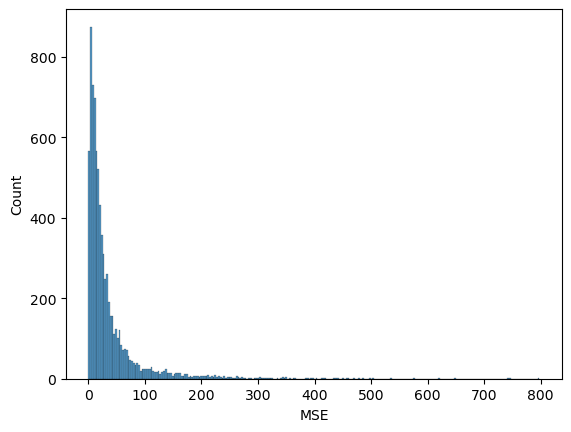

In [17]:
ax = sns.histplot(data=mse)
ax.set(xlabel='MSE')

[Text(0.5, 0, 'MAE')]

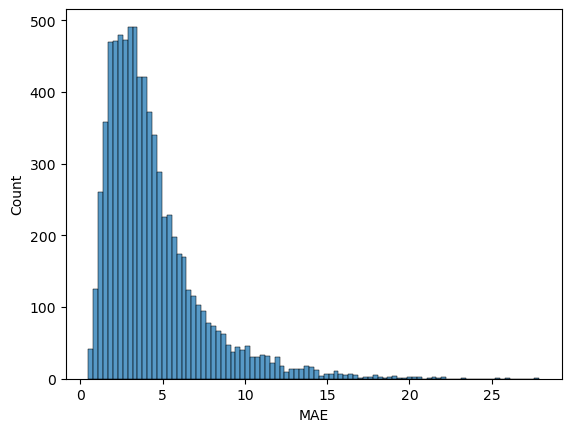

In [18]:
ax = sns.histplot(data=mae)
ax.set(xlabel='MAE')

In [19]:
mse_max = mse.index(max(mse))
mse_min = mse.index(min(mse))
mse_max, mse_min

(1301, 4013)

In [20]:
mae_max = mae.index(max(mae))
mae_min = mae.index(min(mae))
mae_max, mae_min

(1301, 4013)

In [21]:
def make_plot(index):
    plt.figure(figsize=(15, 4))
    plt.plot(df_raw['time_stamp'][test_start + index - seq_len:test_start + index + 1], df_raw['m_2'][test_start + index - seq_len:test_start + index + 1], color='blue', label='input', linewidth=2)
    plt.plot(df_raw['time_stamp'][test_start + index:test_start + index + pred_len], true_inverse[index], color='green', label='real', linewidth=2)
    plt.plot(df_raw['time_stamp'][test_start + index:test_start + index + pred_len], pred_inverse[index], color='red', label='predict', linewidth=2)
    plt.ylabel('cpu load', fontsize=12)
    plt.xlabel('time stamp', fontsize=12)
    plt.legend(fontsize=10, loc=2)
    plt.show()

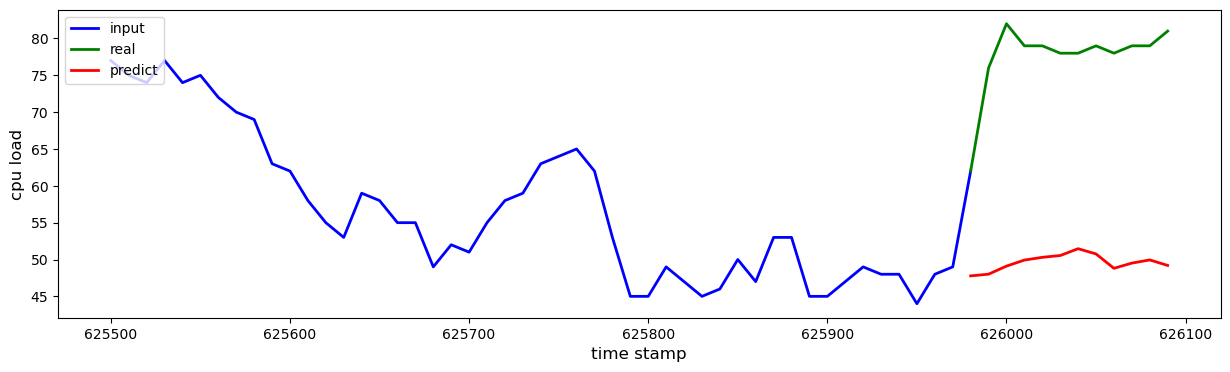

In [22]:
make_plot(mse_max)

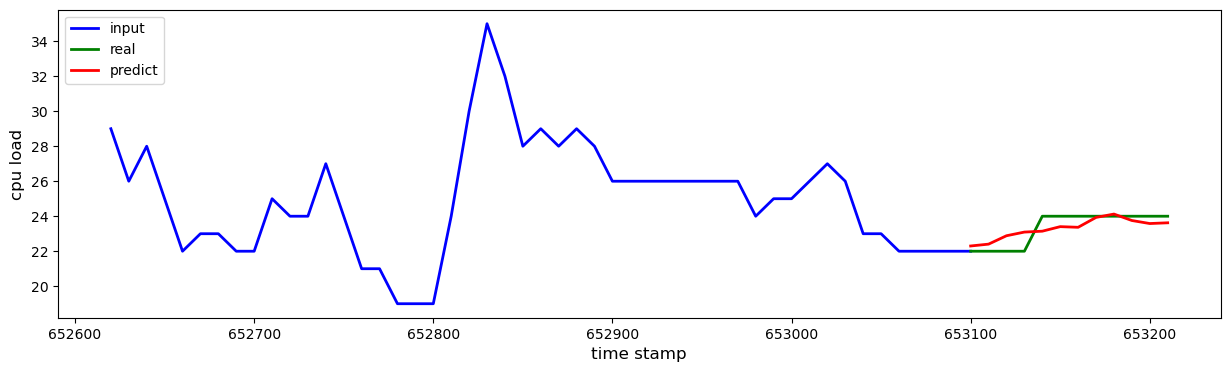

In [23]:
make_plot(mse_min)

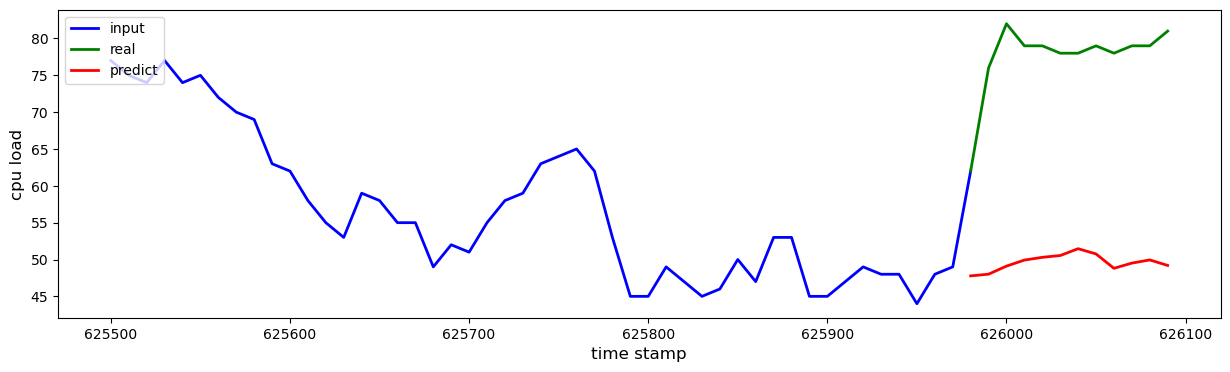

In [24]:
make_plot(mae_max)

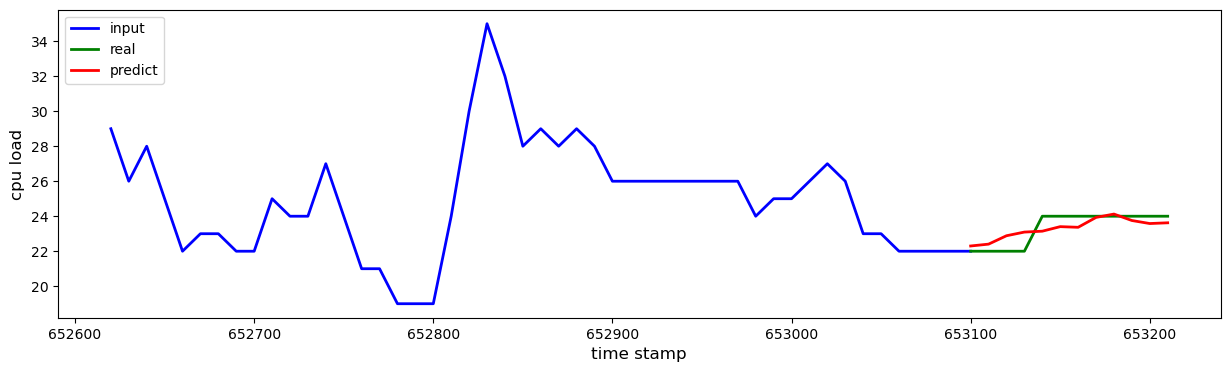

In [25]:
make_plot(mae_min)

In [26]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from natsort import natsorted

def make_multi_plot(start, end):
    path = "./figure"
    if not os.path.isdir(path):
        os.makedirs(path, mode=0o777)
    for i in np.arange(start, end, 1):
        plt.figure(figsize=(15, 4))
        plt.plot(df_raw['time_stamp'][test_start + i - seq_len:test_start + i + 1], df_raw['m_2'][test_start + i - seq_len:test_start + i + 1], color='blue', label='input', linewidth=2)
        plt.plot(df_raw['time_stamp'][test_start + i:test_start + i + pred_len], true_inverse[i], color='green', label='real', linewidth=2)
        plt.plot(df_raw['time_stamp'][test_start + i:test_start + i + pred_len], pred_inverse[i], color='red', label='predict', linewidth=2)
        plt.ylabel('cpu load', fontsize=12)
        plt.xlabel('time stamp', fontsize=12)
        plt.legend(fontsize=10, loc=2)
        plt.savefig(path + '/temp{}.png'.format(i))
        plt.clf()
        plt.close()

def make_gif(duration=200): 
    """
    in imageio-2.33.1
    fps=50 == duration=20 (1000 * 1/50); duration: ms stay in a frame 
    """ 
    input_dir = './figure'
    output_file = 'result.gif'
    images = []
    for filename in natsorted(os.listdir(input_dir)):
        if filename.endswith('.png'):
            file_path = os.path.join(input_dir, filename)
            images.append(imageio.imread(file_path))
    imageio.mimsave(output_file, images, duration=duration)
    if os.path.exists(output_file):
        print("gif made successfully")
    else:
        print("failed to make gif")

In [27]:
import glob
def delete_all_png_in_figurefolder():
    folder_path = "./figure"
    file_type = "png"

    search_path = os.path.join(folder_path, f"*.{file_type}")
    file_list = glob.glob(search_path)

    for file_path in file_list:
        try:
            os.remove(file_path)
        except:
            print(f"Error while deleting file: {file_path}")

In [28]:
make_multi_plot(mse_min - 100, mse_min + 500)

In [29]:
make_gif()

gif made successfully
